In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit

In [3]:
data = np.loadtxt('/Users/daniel_vander-hyde/Documents/OneDrive - Syracuse University/CO2Y_point95W_step_minute_trend_october_18_2018.dat')

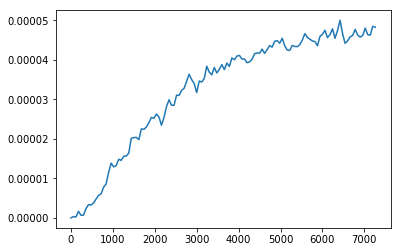

In [4]:
#OCTOBER 18th CO2Y step response data
t = np.arange(0,len(data[:,0]),1)*60
HWSY = data[:,1]
HWSY = [HWSY[i] + abs(min(HWSY)) for i in range(0,len(HWSY))]
plt.plot(t,HWSY)
plt.show()

In [1]:
b, a = signal.butter(2, 0.01)
y2 = signal.filtfilt(b,a,HWSY)

NameError: name 'signal' is not defined

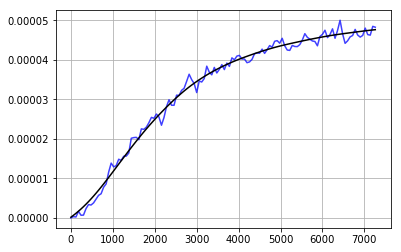

4.8281787e-05


In [6]:
plt.plot(t, HWSY, 'b', alpha=0.75)
plt.plot(t, y2, 'k')
plt.grid(True)
plt.show()
print(HWSY[-1])

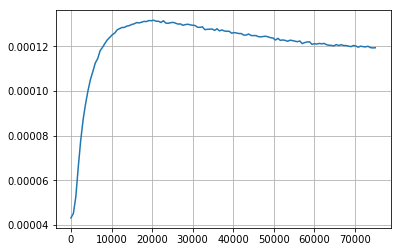

In [9]:
#IFO thermal response
#Load the Hartmann data
datay = np.loadtxt('/Users/daniel_vander-hyde/Documents/lab_folder/hanford_journal/2018_12/12_07_2018/ifo_thermal_response_12_07_2018/ITMY_HWS.dat')
datax = np.loadtxt('/Users/daniel_vander-hyde/Documents/lab_folder/hanford_journal/2018_12/12_07_2018/ifo_thermal_response_12_07_2018/ITMX_HWS.dat')

t_ifo = np.arange(0,len(datax[:-1,0]),1)*60*10
HWSY_ifo= datay[:-1,1]
plt.plot(t_ifo,HWSY_ifo)
plt.grid(True)
plt.show()

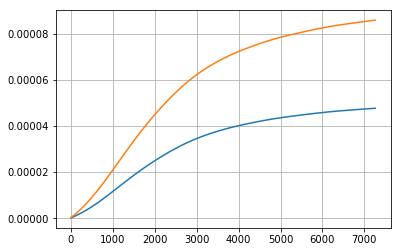

In [10]:
HWSY_rescale = [y2[i]*(1.71)/.95 for i in range(0,len(y2))]
#HWSY = [HWSY[i*10] for i in range(0,(round(len(HWSY)/10)-1))]
#t_new = t_ifo[:len(HWSY)]

#ifo_wo_CO2Y = HWSY_ifo[:len(HWSY)]-HWSY
plt.plot(t, y2, t, HWSY_rescale)
plt.grid(True)
plt.show()

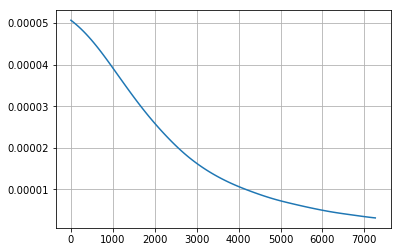

In [11]:
HWSY_decay = [(50.82e-6 - y2[i]) for i in range(len(y2))]
plt.plot(t, HWSY_decay)
plt.grid(True)
plt.show()

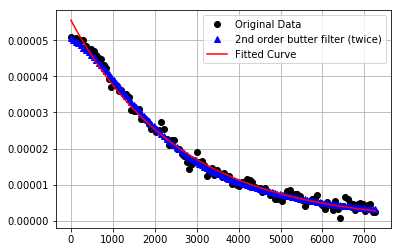

5.62470866284e-05
0.000385644690824
-6.92417487498e-07


In [14]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

HWSY_real_decay = [(50.82e-6-HWSY[i]) for i in range(len(HWSY))]

p_guess = [max(y2), .001, 0]

popt, pcov = curve_fit(func, t, HWSY_real_decay, p_guess )

plt.figure()
plt.plot(t, HWSY_real_decay, 'ko', label="Original Data")
plt.plot(t, HWSY_decay, 'b^', label="2nd order butter filter (twice)")
plt.plot(t, func(t, *popt), 'r-', label="Fitted Curve")
plt.grid(True)
plt.legend()
plt.show()
print(popt[0])
print(popt[1])
print(popt[2])

In [15]:
popt[0]*np.exp(-popt[1]*(1800)) + popt[2]
residuals = func(t,*popt)-HWSY_decay

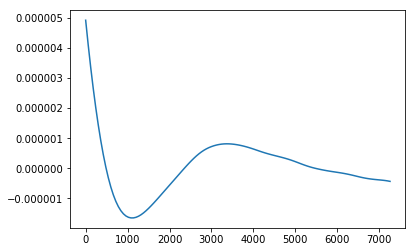

In [19]:
plt.plot(t,residuals)
plt.show()